In [1]:

import pandas as pd
import numpy as np
import re
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import math



In [2]:
df = pd.read_csv('mhdf.csv')

In [3]:
df.head()

,Unnamed: 0,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,...,"If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?",Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?,Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?,"Overall, how well do you think the tech industry supports employees with mental health issues?",Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.),What is your age?,What is your gender?,What is your race?,What country do you *work* in?,What US state or territory do you *work* in?
0,0,1,1,2,0,1,1,2,7.0,1,...,8,0,2,4,0,25,M,White,United States of America,Nebraska
1,1,1,1,1,0,0,1,1,NaN,1,...,7,1,1,1,0,51,M,White,United States of America,Nebraska
2,2,1,1,2,0,0,2,2,4.0,3,...,4,2,1,2,1,27,M,White,United States of America,Illinois
3,3,1,1,2,0,1,1,1,7.0,1,...,8,0,1,3,0,37,M,White,United States of America,Nebraska
4,4,1,1,2,0,2,2,2,NaN,1,...,5,0,0,3,0,46,M,White,United States of America,Nebraska


In [4]:
data = df.drop(df.columns[[0,8,16,17,33,34,35,36,37]], axis=1)


In [5]:
data.drop(index=data[data['Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?'] == "I've always been self-employed"].index, inplace=True)

In [6]:
data.head()

In [38]:
train_data = data[:250]
test_data = data[250:]
train_genders = df["What is your gender?"][:250]

0      M
1      M
2      M
3      M
4      M
      ..
245    M
246    M
247    M
248    M
249    M
Name: What is your gender?, Length: 250, dtype: object

Fraction of the total variance explained by first...
     1 principal component(s): 0.5733218432824125
     2 principal component(s): 0.6822989031868505
     3 principal component(s): 0.7423923119204053
     4 principal component(s): 0.7794123917216518
     5 principal component(s): 0.8154474524428449
     10 principal component(s): 0.8942538755791885
     15 principal component(s): 0.9434119000070795
     20 principal component(s): 0.9760364363700698
     28 principal component(s): 1.0000000000000004


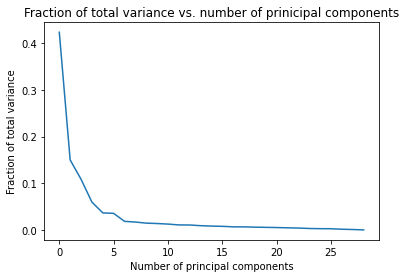

In [8]:
#PCA analysis
pca_mod = PCA(n_components= 29)
pca_mod.fit(train_data)

#fraction of total variance explained by first k principal components
k = [1, 2, 3, 4, 5, 10, 15, 20, 28]
cumsum = np.cumsum(pca_mod.explained_variance_ratio_)
print("Fraction of the total variance explained by first...")
for i in k:
    print("     %d principal component(s):" % i, cumsum[i])

#plot of fraction of total variance
plt.plot(pca_mod.explained_variance_ratio_)
plt.title("Fraction of total variance vs. number of prinicipal components")
plt.xlabel("Number of principal components")
plt.ylabel("Fraction of total variance")
plt.show()

In [25]:
pca = PCA(n_components = 3)
train_2d = pca.fit_transform(train_data)

In [33]:
df["What is your gender?"]


0      M
1      M
2      M
3      M
4      M
      ..
324    F
325    M
326    M
327    F
328    F
Name: What is your gender?, Length: 329, dtype: object

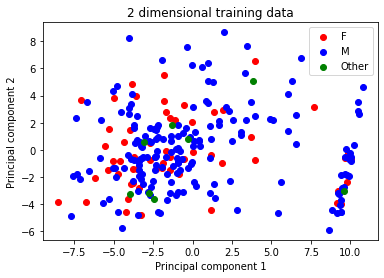

In [47]:
for lab, col in zip(("F", "M", "Other"),
                    ('red', 'blue','green')):
    plt.scatter(train_2d[train_genders==lab, 0],
                train_2d[train_genders==lab, 1],
                label=lab,
                c=col)
plt.title("2 dimensional training data")
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.legend(loc='upper right')
plt.show()

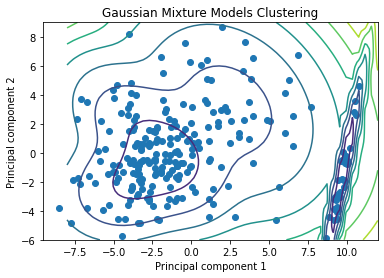

In [51]:
pca = PCA(n_components = 2)
train_2d = pca.fit_transform(train_data)
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=12345).fit(train_2d)
labels = gmm.predict(train_2d)
x = np.linspace(-8., 12.)
y = np.linspace(-6., 9.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(X.shape)
contour_plot = plt.contour(X, Y, Z)
plt.scatter(train_2d[:,0], train_2d[:,1])

plt.title("Gaussian Mixture Models Clustering")
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.show()


In [48]:
importance_mental_health = alt.Chart(df).mark_bar().encode(
    x=alt.X('Overall, how much importance does your employer place on mental health?', title='Rating', bin= True),
    y='count()',
    #color=alt.Color('nationality', legend=alt.Legend(title='Nationality')),
    #tooltip=['nationality', 'weight_kg', 'movement_agility']
).properties(
    title='Importance of Mental Health',
    width=600,
    height=400
).interactive()

importance_mental_health.save('importance_mental_health.html')
importance_mental_health

alt.Chart(...)

In [14]:
alt.Chart(df).mark_bar().encode(
    alt.X("Does your employer offer resources to learn more about mental health disorders and options for seeking help?", bin=True),
    y='What is your gender?',
)


alt.Chart(...)

In [50]:
alt.Chart(df).mark_circle(size=60).encode(
    x=alt.X('What is your gender?', scale=alt.Scale(domain=[10, 45])),
    y='Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
    color = alt.Color('What is your gender?', scale=alt.Scale(scheme='darkblue')))

alt.Chart(...)

In [16]:
table = df.groupby('Does your employer offer resources to learn more about mental health disorders and options for seeking help?')['What is your gender?'].count().to_frame('count').reset_index()
table

,Does your employer offer resources to learn more about mental health disorders and options for seeking help?,count
0,-1,47
1,0,121
2,1,90
3,2,71


In [17]:
add = df["What is your gender?"]
table = table.join(add)


In [18]:
alt.Chart(table).mark_bar().encode(
    alt.X("Does your employer offer resources to learn more about mental health disorders and options for seeking help?", bin=True),
    y='count',
     color = alt.Color('What is your gender?')
)

alt.Chart(...)

In [19]:
indexNames = df[df['What is your gender?'] == '-1'].index
indexNames

Int64Index([7, 46, 62, 287, 292], dtype='int64')

In [20]:
df['What is your gender?'].value_counts()

M        223
F         89
Other     12
-1         5
Name: What is your gender?, dtype: int64

In [21]:
importance = df.drop(indexNames, axis=0)
importance['What is your gender?'].value_counts()

M        223
F         89
Other     12
Name: What is your gender?, dtype: int64

In [22]:
importance_melt = pd.melt(importance, id_vars=['What is your gender?'],
                value_vars=['Have you had a mental health disorder in the past?'],
                var_name='had_mental_disorder', value_name='yes_no')
importance_melt.head()

,What is your gender?,had_mental_disorder,yes_no
0,M,Have you had a mental health disorder in the p...,0
1,M,Have you had a mental health disorder in the p...,2
2,M,Have you had a mental health disorder in the p...,0
3,M,Have you had a mental health disorder in the p...,0
4,M,Have you had a mental health disorder in the p...,0


In [49]:
diagnoses_chart = alt.Chart(importance_melt).mark_area(
    opacity=0.5,
    interpolate='step'
).encode(
    alt.X('yes_no:Q', bin=alt.Bin(maxbins=100)),
    alt.Y('count()', stack=None),
    alt.Color('What is your gender?:N')
).properties(
    title='Past Mental Health Diagnoses by Gender'
)

diagnoses_chart.save("diagnoses_chart.html")
diagnoses_chart

alt.Chart(...)

In [40]:
data['Do you know the options for mental health care available under your employer-provided health coverage?'].value_counts()

 0    139
 1    117
-1     71
Name: Do you know the options for mental health care available under your employer-provided health coverage?, dtype: int64